# Run the simple wave model

In this tutorial we will use the geometric eigenmodes and eigenvalues to simulate cortical activity, using the [Pang *et al.* 
 (2023)](https://doi.org/10.1038/s41586-023-06098-1) model based on neural field theory. Here, the spatiotemporal evolution of activity $\phi(\vec r,t)$ is described by an isotropic damped wave equation without regeneration,

$$
\displaystyle [\frac{1}{\gamma_s^2}\frac{\partial^2}{\partial t^2}+\frac{2}{\gamma_s}\frac{\partial}{\partial t}+1-r_s^2\nabla^2]\phi(\vec r,t)=Q(\vec r,t),
$$

where:
- $\gamma_s$ denotes the temporal damping parameter
- $r_s$ denotes the spatial length scale parameter
- $\nabla^2$ denotes the Laplace-Beltrami operator
- $Q(\vec r,t)$ denotes an external input

As in the previous tutorials, we begin by initialising the EigenSolver with a cortical surface and medial wall mask. This time we can try out the macaque data.

In [1]:
from nsbtools.io import fetch_surf
from nsbtools.eigen import EigenSolver
from nsbtools.utils import unmask
from nsbtools.plotting import plot_surf
from importlib.resources import files

mesh, medmask = fetch_surf(species='macaque')

solver = EigenSolver(mesh, mask=medmask)

We can then call the `simulate_waves` class method:

In [2]:
sim_ts = solver.simulate_waves()

Solved Laplace-Beltrami eigenvalue problem, stored in self.emodes and self.evals.


Note that 1000 timepoints (`nt`) are simulated by default, with a timestep of 0.1 ms (`dt`), using white noise as external input.

To visualise activity, we can first sample a few timepoints from the output and add the medial wall back in:

In [3]:
sim_ts_sample = unmask(sim_ts[:, ::240], medmask)  # Sample every 240 time points

Each timepoint of activity is then visualised in the plotter:

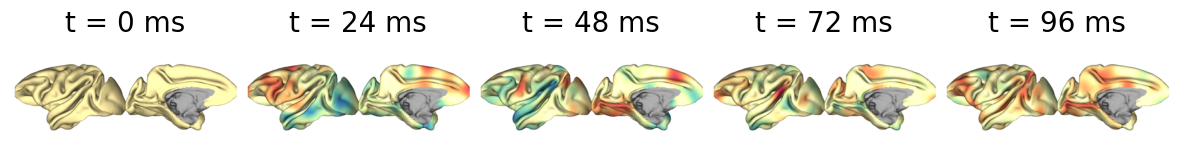

In [ ]:
lh_surfpath = files('nsbtools.data') / 'sp-macaque_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
plot_surf(
    lh_surfpath,
    sim_ts_sample,
    labels=[f't = {i*24} ms' for i in range(5)],
    cmap='Spectral',
    color_range='group'
)